# Analyse des scores pour déterminer le meilleur modèle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

datas = pd.read_csv("Pélec_16_scores.csv", index_col=0)
datas

,Ridge,SVR,LR,Lasso,XGB,RFR
train_score,0.951603,0.919916,0.913058,0.946841,0.981267,0.471192
test_score,0.948600,0.936123,0.941877,0.951586,0.897920,0.355819


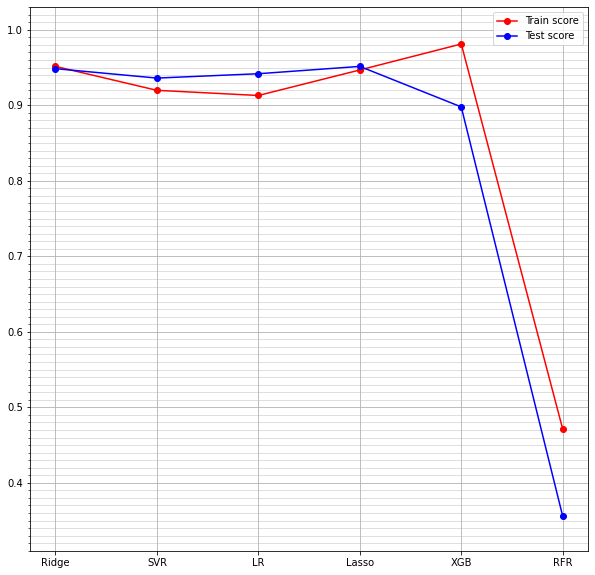

In [2]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot([x for x in datas.columns], [datas.loc["train_score", x] for x in datas.columns], "ro-", label= "Train score")
ax.plot([x for x in datas.columns], [datas.loc["test_score", x] for x in datas.columns], "bo-", label= "Test score")

ymin = round(datas.min().min()-0.05, 2)
ymax = round(datas.max().max()+0.05, 2)
plt.ylim(ymin, ymax)
ax.set_yticks(np.linspace(ymin, ymax, int((ymax-ymin)*100+1)), minor=True)

ax.grid(True, which="major" , axis="y", alpha= 1)
ax.grid(True, which="minor" , axis="y", alpha= 0.5)
ax.grid(True, which="major" , axis="x")

ax.legend()
plt.show()

Le train score doit être supérieur au test score donc on peut de facto retirer les modèles SVR, Régression Linéaire et Lasso.

Ensuite, le Random Forest Regressor a un score trop bas pour être intéressant et le Gradient Boosting semble présenter de l'overfitting.


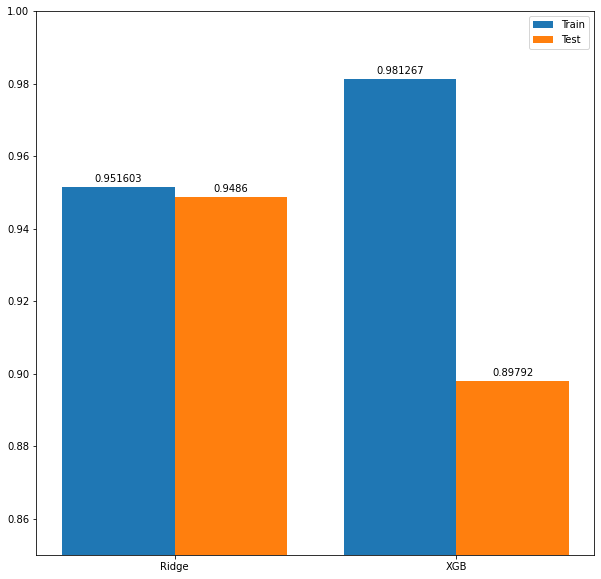

In [4]:
labels = ["Ridge", "XGB"]
train_scores = [datas.loc["train_score", x] for x in ["Ridge", "XGB"]]
test_scores = [datas.loc["test_score", x] for x in ["Ridge", "XGB"]]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, train_scores, width, label= "Train")
rects2 = ax.bar(x + width/2, test_scores, width, label= "Test")

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.ylim(0.85, 1.0)

ax.legend()
plt.show()


Le train score du Gradient Boosting est très proche de 1 (0.98) ce qui laisse supposer qu'il est plus susceptible d'overfitter que Ridge dont le train score est de 0.95. 

De plus, l'écart entre les train et test scores sont quasiment nuls pour Ridge alors qu'il y a un écart de presque 0.1 points pour le Gradient Boosting. Cela laisse penser que le modèle Ridge est mieux entraîné et plus stable.

En définitive, je vais garder le modèle Ridge pour les prédictions.

## Conclusion pour la prédiction d' émissions de gaz à effet de serre ("TotalGHGEmissions")

Après optimisation:
* Modèle => KernelRidge
* Hyperparamètres =>
  * alpha: 1.0 
  * gamma: 0.01 
  * kernel: poly